# **Informações sobre o dataset:**

Este conjunto de dados contém informações médicas e de estilo de vida de 1500 pacientes, projetado para prever a presença de câncer com base em diversas características. O conjunto de dados é estruturado para fornecer um desafio realista para a modelagem preditiva na área médica.


<br><br>


**Age:** Valores inteiros que representam a idade do paciente, variando de 20 a 80 anos.


**Gender:** Valores binários que representam o gênero, onde 0 indica Masculino e 1 indica Feminino.


**BMI:** Valores contínuos que representam o Índice de Massa Corporal (IMC), variando de 15 a 40.


**Smoking:** Valores binários que indicam se você fuma ou não, onde 0 significa Não e 1 significa Sim.


**GeneticRisk**: Valores categóricos que representam os níveis de risco genético para câncer, sendo 0 indicativo de baixo risco, 1 de risco médio e 2 de risco alto.


**PhysicalActivity**: Valores contínuos que representam o número de horas por semana dedicadas a atividades físicas, variando de 0 a 10.


**AlcoholIntake**: Valores contínuos que representam o número de unidades de álcool consumidas por semana, variando de 0 a 5.


**CancerHistory**: Valores binários que indicam se o paciente tem histórico pessoal de câncer, onde 0 significa Não e 1 significa Sim.


**Diagnosis**: Valores binários que indicam o status do diagnóstico de câncer, onde 0 indica Sem Câncer e 1 indica Câncer.


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier


In [20]:
df = pd.read_csv('cancer.csv')

In [21]:
df

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1
...,...,...,...,...,...,...,...,...,...
1495,62,1,25.090025,0,0,9.892167,1.284158,0,1
1496,31,0,33.447125,0,1,1.668297,2.280636,1,1
1497,63,1,32.613861,1,1,0.466848,0.150101,0,1
1498,55,0,25.568216,0,0,7.795317,1.986138,1,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


# **Análise Exploratória**

## 1. Quantas linhas e colunas possui o dataset? Existem nulos?

In [23]:
df.shape

(1500, 9)

## 2. Qual a idade mais frequente do conjunto de dados?

In [24]:
df['Age'].mode()

0    52
Name: Age, dtype: int64

## 3. Qual a idade mais frequente dos pacientes que foram diagnosticados com câncer?

In [25]:
idade_com_cancer = df.loc[df['Diagnosis'] == 1, 'Age'].mode()
print(idade_com_cancer.values[1])

66


## 4. Fumantes têm mais câncer que não fumantes?

In [26]:
#pd.crosstab(df['Smoking'], df['Diagnosis'])
pd.crosstab(df['Smoking'], df['Diagnosis'], normalize='index')
#cancer_rate_by_smoking = pd.crosstab(df['Smoking'], df['Diagnosis'], normalize='index')
#cancer_rate_by_smoking.plot(kind='bar', stacked=True)
#plt.title('Taxa de Câncer por Hábito de Fumar')

Diagnosis,0,1
Smoking,,
0,0.695255,0.304745
1,0.448020,0.551980


## 5. Qual a proporção das classes da variável alvo? Tem mais pacientes diagnosticados com câncer ou sem câncer? As classes são desbalanceadas?

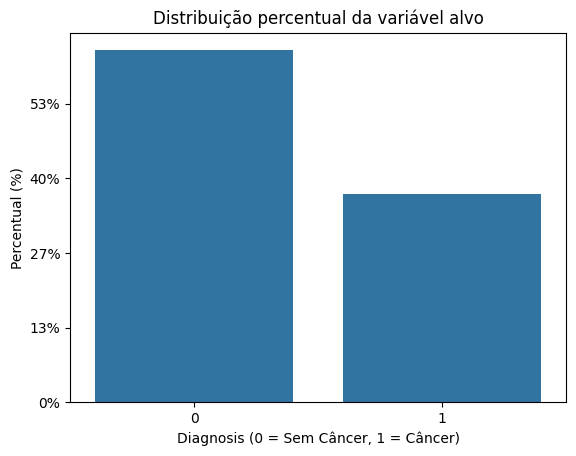

In [27]:
# df['Diagnosis'].value_counts()

#df['Diagnosis'].value_counts(normalize=True)

# sns.countplot(data=df, x='Diagnosis')
# plt.xlabel('Diagnosis (0 = Sem Câncer, 1 = Câncer)')
# plt.title('Distribuição da variável alvo')
# plt.show()

from matplotlib.ticker import PercentFormatter

ax = sns.countplot(data=df, x='Diagnosis')
ax.yaxis.set_major_formatter(PercentFormatter(xmax=len(df))) 

ax.set_xlabel('Diagnosis (0 = Sem Câncer, 1 = Câncer)')
ax.set_ylabel('Percentual (%)')
plt.title('Distribuição percentual da variável alvo')
plt.show()


#Podemos notar que a maioria dos dados pertence à classe 0 (sem câncer), 
# indicando um desbalanceamento na variável alvo. Apesar disso, o desbalanceamento é leve, 
# por não chegar a 70% dos valores - 63% sem câncer e 37% com câncer

## 6. Qual a distribuição das variáveis numéricas? Alguma delas apresenta distribuição normal? Ou todas são assimétricas?

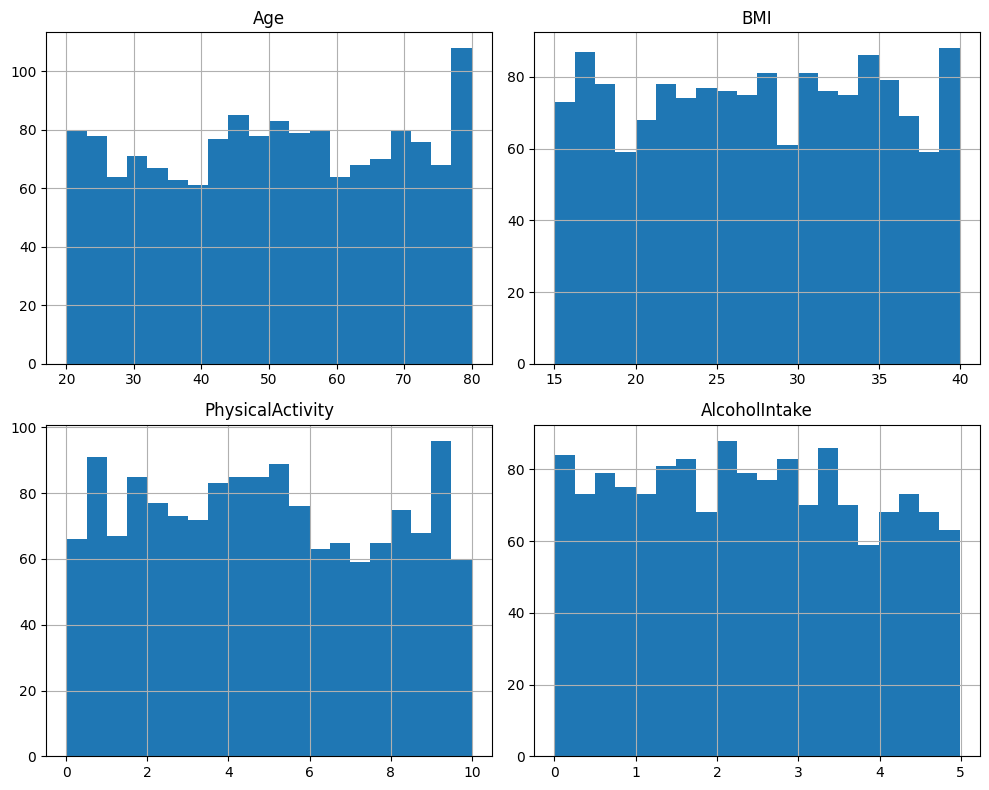

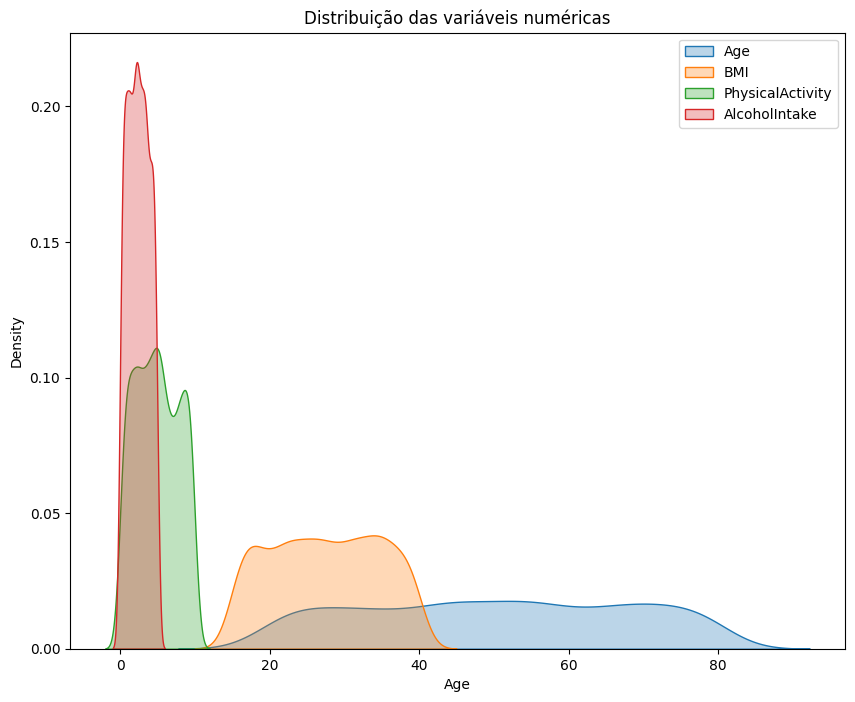

,Age,BMI,PhysicalActivity,AlcoholIntake
mean,50.320000,27.513321,4.897929,2.417987
median,51.000000,27.598494,4.834316,2.382971
skew,-0.032819,-0.021391,0.076022,0.055101


In [28]:

# busca as colunas que são numéricas e possuem mais de 3 valores únicos
numeric_cols = [
    col for col in df.select_dtypes(include=['float64', 'int64']).columns
    if df[col].nunique() > 3
]

# Estatísticas descritivas
df[numeric_cols].describe()

# Histogramas das variáveis numéricas
df[numeric_cols].hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

# Gráfico de densidade (KDE) das variáveis numéricas
plt.figure(figsize=(10, 8))
for col in numeric_cols:
    sns.kdeplot(df[col], label=col, fill=True, alpha=0.3)
plt.legend()
plt.title('Distribuição das variáveis numéricas')
plt.show()

# Calcular medidas de tendência central e assimetria
df[numeric_cols].agg(['mean', 'median', 'skew'])

#Skew = 0 -> distribuição mais simétrica (próxima da normal).

# Skew > 0 -> assimetria à direita (cauda longa para valores altos).

# Skew < 0 -> assimetria à esquerda.

#A partir do gráfico de densidade das variáveis numéricas, observa-se que nenhuma delas apresenta uma distribuição perfeitamente normal.
#A variável Age está relativamente espalhada ao longo da faixa etária, mas com irregularidades e mais de um “pico”, o que indica que não é perfeitamente simétrica.
#As variáveis BMI, PhysicalActivity e AlcoholIntake mostram distribuições claramente assimétricas à direita, com a maior parte dos pacientes concentrada em valores mais baixos e uma cauda que se estende para valores mais altos.
#Portanto, conclui-se que as distribuições das variáveis numéricas do dataset são predominantemente assimétricas, não seguindo o padrão de uma distribuição normal.

#============================================================

# numeric_cols = df.select_dtypes(include=['float64', 'int64'])
 
# # Estatísticas descritivas
# print("\n=== Estatísticas Descritivas ===")
# print(numeric_cols.describe())
 
# # Calcular skewness (assimetria)
# skew_values = numeric_cols.skew()
# print("\n=== Skewness (Assimetria) ===")
# print(skew_values)
 
# # Interpretar cada variável
# print("\n=== Interpretação da Distribuição ===")
# for col, skew in skew_values.items():
#     if abs(skew) < 0.5:
#         print(f"{col}: distribuição aproximadamente NORMAL (skew={skew:.2f})")
#     elif skew >= 0.5:
#         print(f"{col}: distribuição ASSIMÉTRICA à direita (skew={skew:.2f})")
#     else:
#         print(f"{col}: distribuição ASSIMÉTRICA à esquerda (skew={skew:.2f})")
       
# # Criar o gráfico (boxplot)
# plt.figure(figsize=(10, 6))
# plt.boxplot(numeric_cols.values, labels=numeric_cols.columns)
# plt.title("Distribuição das Variáveis Numéricas (Boxplot)")
# plt.xticks(rotation=45)
# plt.tight_layout()
 
# plt.show()    


# ------**Construção do Modelo**--------

## 1. Divisão das variáveis em X e y

In [29]:
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

## 2. Divisão em treino e teste

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

test_size=0.2: Define que 20% dos dados serão guardados para o teste final. Os outros 80% serão usados para treinar o modelo.
random_state=42: É  gerador de números aleatórios. Garante que, toda vez que você rodar esse código, a mistura e divisão dos dados seja exatamente a mesma. 
stratify=y : O stratify força a divisão a manter essa mesma proporção tanto no treino quanto no teste. Sem isso, você poderia acabar com um teste só com pacientes saudáveis, o que falsearia a nota do modelo.

## 3. Normalização dos dados

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

StandardScaler coloca tudo na mesma régua (média 0, desvio padrão 1). 
fit_transform(X_train): Aqui o scaler "aprende" (fit) a média e o desvio padrão dos dados de treino e já os transforma.
transform(X_test): Aqui usamos a régua que aprendemos no treino para medir o teste.

## 4. Escolha e Treinamento do Modelo

In [33]:
log_model  = LogisticRegression(random_state=42)
log_model.fit(X_train_scaled, y_train)

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)    

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


LogisticRegression: Aqui estamos "instanciando" o modelo.
.fit(...):  É aqui que o computador analisa as 1200 linhas de treino, procurando padrões matemáticos que diferenciam quem tem câncer de quem não tem. Ele ajusta os pesos de cada variável.

## 5. Previsões

In [34]:
y_pred_log = log_model.predict(X_test_scaled)

y_pred_tree = tree_model.predict(X_test)

Este comando compara o gabarito oficial (y_test) com os chutes do modelo (y_pred).

## 6. Avaliação das previsões

In [40]:
print("Regressão Logística")
print(classification_report(y_test, y_pred_log))
print("Acurácia:", accuracy_score(y_test, y_pred_log))

print("\n\nÁrvore de Decisão")
print(classification_report(y_test, y_pred_tree))
print("Acurácia:", accuracy_score(y_test, y_pred_tree))

Regressão Logística
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       189
           1       0.80      0.77      0.79       111

    accuracy                           0.84       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.84      0.84      0.84       300

Acurácia: 0.8433333333333334


Árvore de Decisão
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       189
           1       0.80      0.86      0.83       111

    accuracy                           0.87       300
   macro avg       0.85      0.86      0.86       300
weighted avg       0.87      0.87      0.87       300

Acurácia: 0.8666666666666667


## 7. Responda: Qual modelo obteve a melhor performance? Compare as métricas de precisão, recall, f1 score e acurácia para responder essa pergunta.

Pode-se notar que, apesar de uma diferença pequena, a árvcore de decisão teve maior acurácia.
Mas não podemos focar apenas nesse dado em problemas desse tipo. 
Olhando as pessoas retornadas sem cancer, a árvore mostrou maior confiança, gerando menos falso negativo (paciente com câncer classificado como 0) que a regressão logística. 
A classe 1, aqueles que possuem câncer, os dois métodos possuem a mesma precisão. O recall (pessoas com câncer de fato identificada pelo modelo) apresentado sim, tem bastante diferença. Logo, a regressão logística apresenta mais falsos positivos. O equilíbrio entre precision e recall (f1-score) tbm é melhor no modelo em árvore.
A atenção maior se da na situação crítica de um paciente precisar de tratamento (ter cancer) e o modelo diz que elee esta saudável (falso negativo).
Logo, a árvore se apresenta como um modelo mais adequado para esses dados.

## 8. Agora teste rodar o modelo utilizando os parâmetros de "gini" e "entropy". Qual performou melhor?


In [41]:
#entropia primeiro - dados perdem um pouco de precisão
tree_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
tree_entropy.fit(X_train, y_train)

#precisão né?
y_pred_entropy = tree_entropy.predict(X_test)

tree_gini = DecisionTreeClassifier(criterion="gini", random_state=42)
tree_gini.fit(X_train, y_train)   

y_pred_gini = tree_model.predict(X_test)

print("gini")
print(classification_report(y_test, y_pred_gini))
print("Acurácia:", accuracy_score(y_test, y_pred_gini))

print("\n\nentropy")
print(classification_report(y_test, y_pred_entropy))
print("Acurácia:", accuracy_score(y_test, y_pred_entropy))

gini
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       189
           1       0.80      0.86      0.83       111

    accuracy                           0.87       300
   macro avg       0.85      0.86      0.86       300
weighted avg       0.87      0.87      0.87       300

Acurácia: 0.8666666666666667


entropy
              precision    recall  f1-score   support

           0       0.91      0.86      0.89       189
           1       0.79      0.86      0.82       111

    accuracy                           0.86       300
   macro avg       0.85      0.86      0.85       300
weighted avg       0.86      0.86      0.86       300

Acurácia: 0.86


A acurácia foi praticamente a mesma, com pequena  diferença favorável ao parâmetro Gini.
O recall é o mesmo, logo, conseguem encontrar a mesma proporção de pacientes que realmente têm câncer.
Gini tbm teve uma melhor precision, mas poucoa diferença novamente. Com isso, Gini erra um pouco menos ao assumir que uma pessoa tem câncer. O mesmo ocorre com o f1-score, onde o equilibro entre a precisão e o recall é levemente melhor.
De forma prática e objetiva, os dois são bons. O critério Gini performou melhor que o Entropy, ainda que a diferença seja pequena.
